In [249]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Read the workbook

In [250]:
data = pd.ExcelFile(r'/Users/lanaguest/Personal/KBC/Task_Data_Scientist_Dataset.xlsx',  engine='openpyxl')

Read workbook tabs

In [251]:
soco_demo = pd.read_excel(data, 'Soc_Dem')
prd_accntbal = pd.read_excel(data, 'Products_ActBalance')
inflow_outflow = pd.read_excel(data, 'Inflow_Outflow')
sales_revenue = pd.read_excel(data, 'Sales_Revenues')

Join the tabs

In [252]:
data = soco_demo.merge(prd_accntbal, on = 'Client', how = 'left').merge(inflow_outflow, on = 'Client', how = 'left').sort_values(by='Client')

Removing nan containing rows in the Sex Column as they are few in number

# Initial Data Cleaning

In [253]:
print('Number of datapoints are {} and number of attributes are {}'.format(data.shape[0], data.shape[1]))

Number of datapoints are 1615 and number of attributes are 30


In [254]:
print('Nans in dataset are {}'.format(data.isna().sum().sum()))

Nans in dataset are 13633


In [255]:
data['Sex'].fillna(value='M', inplace=True)

There are outliers in the column Age (any age less than 18 or more than 100) as well as the tenure columns (where Tenure is greater than age)
First filter the datapoints where the age is an outlier

In [256]:
data = data.drop(data[(data['Age'] < 18) | (data['Age'] > 100)].index)

verifying whether the tenure is correct/
assumption: Any Tenure which suggests that a client is with the bank before 18 years of age is incorrect

In [257]:
data = data.drop(data[data['Age'] - round(data['Tenure']/12,2) < 18].index)

fill the missing values with zero since the logic is that a certain account balance column has an entry only when they have that particular account

In [258]:
data.fillna(0, inplace = True)

remove datapoints with ActBal and Transaction volumes are greater than 60000

Add age range for visualization

In [259]:
data['Age range'] =pd.cut(data['Age'], [18,40,60,80,100], labels = ['group_1', 'group_2', 'group_3', 'group_4'])

Check for outliers 

<AxesSubplot:>

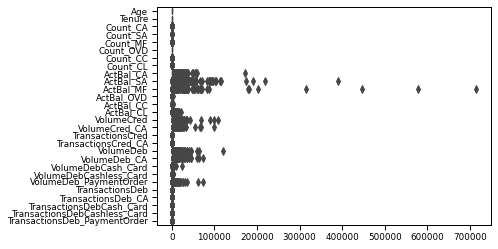

In [260]:
sns.boxplot(data = data.drop(['Age range', 'Sex', 'Client'], axis=1), orient = 'h')

Remove datapoints with ActBal and Transaction volumes are greater than 60000

In [261]:
data = data.query("ActBal_SA <=60000 & ActBal_CA <=60000 & ActBal_MF <=60000 & VolumeCred <=60000 & VolumeDeb <= 60000")

<AxesSubplot:>

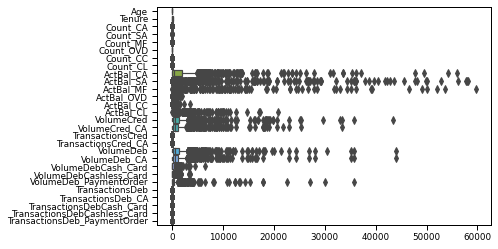

In [262]:
sns.boxplot(data = data.drop(['Age range', 'Sex', 'Client'], axis=1), orient = 'h')

# Data Exploration
Sex of the clients

Text(0.5, 1.0, 'Count of clients based on Sex')

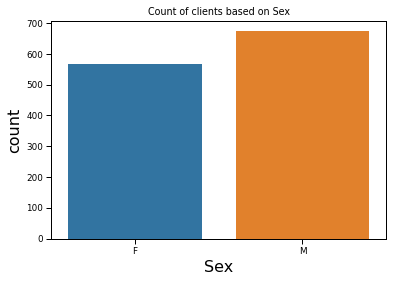

In [263]:
data['Sex'] = data['Sex'].astype(str)
sns.countplot(x= 'Sex', data = data).set_title("Count of clients based on Sex")

Age and Tenure distribution

Text(0.5, 1.0, 'Age distribution based on sex')

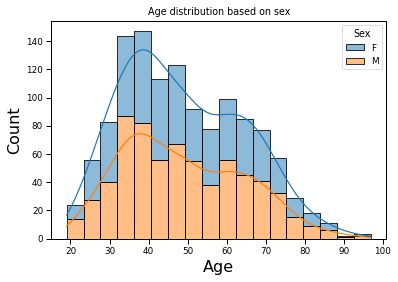

In [264]:
sns.histplot(data = data, x = 'Age', kde = True, hue = 'Sex', multiple = 'stack').set_title("Age distribution based on sex")

Text(0.5, 1.0, 'Tenure distribution based on sex')

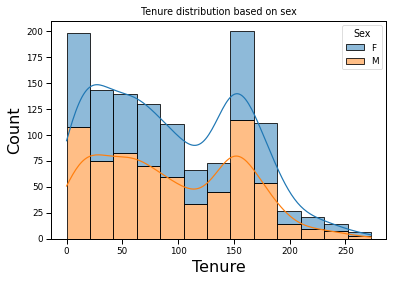

In [265]:
sns.histplot(data = data, x= 'Tenure', kde = True, hue = 'Sex', multiple='stack').set_title("Tenure distribution based on sex")

# Observations:
## 1. Age and Tenure distribution for Male and Female clients is more or les the same
## 2. Bank has majority clients in the age range of 30-60
## 3. Majority clients have had a Tenure between 0-100 months as well as 150-200 months

Distribution of asset balances

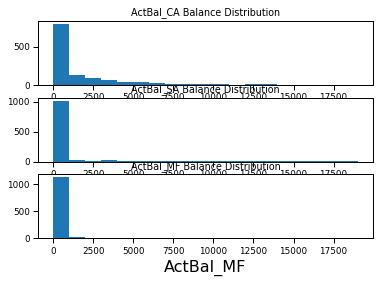

In [266]:
fig, a = plt.subplots(3)
a = a.ravel()
for col,ax in zip(['ActBal_CA', 'ActBal_SA', 'ActBal_MF'], a):
        ax.hist(data[col], bins = range(0,20000,1000))
        ax.set_title('{} Balance Distribution'.format(col))
        ax.set_xlabel(col)

Distribution of liabilities

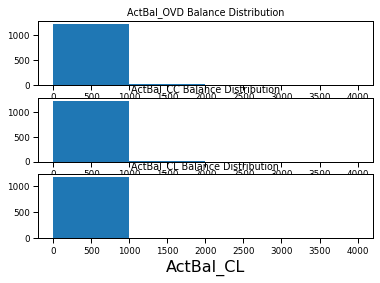

In [267]:
fig, a = plt.subplots(3)
a = a.ravel()
for col,ax in zip(['ActBal_OVD', 'ActBal_CC', 'ActBal_CL'], a):
        ax.hist(data[col], bins = range(0,5000,1000))
        ax.set_title('{} Balance Distribution'.format(col))
        ax.set_xlabel(col)


Comparison of total assets and liabilities

In [268]:
total_asst_liab = pd.concat([pd.DataFrame(data['ActBal_CA'] + data['ActBal_SA']+ data['ActBal_MF'], columns=['assets']),
pd.DataFrame(data['ActBal_OVD'] + data['ActBal_CC'] + data['ActBal_CL'], columns=['liabilities']), data['Age range']], axis = 1)

Text(0.5, 1.0, 'Total assets based on age group')

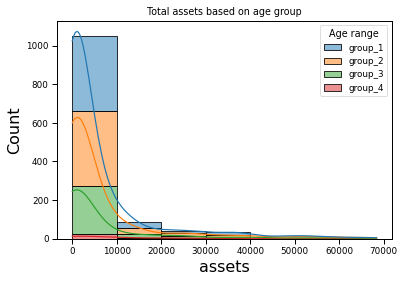

In [269]:
sns.histplot(data = total_asst_liab, x = 'assets', bins= range(0,50000, 10000), label='assets',
             hue = 'Age range', kde=True, multiple= 'stack').set_title('Total assets based on age group')

Text(0.5, 1.0, 'Total liabilities based on age group')

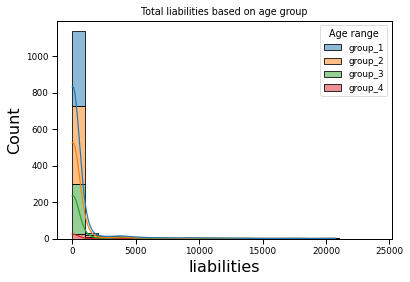

In [270]:
sns.histplot(data = total_asst_liab, x = 'liabilities', bins= range(0,25000, 1000), label='liabilities',
             hue = 'Age range', kde=True, multiple= 'stack').set_title('Total liabilities based on age group')

Total Inflow Outflows

In [271]:
total_flow = pd.concat([pd.DataFrame(data['VolumeCred'] + data['VolumeCred_CA'], columns=['credits']),
pd.DataFrame(data['VolumeDeb'] + data['VolumeDeb_CA'] + data['VolumeDebCash_Card'] + data['VolumeDebCashless_Card'] + data['VolumeDeb_PaymentOrder'],
             columns=['debits']), data['Age range']], axis = 1)

Inflow Outflow distribution

Text(0.5, 1.0, 'Total assets credits on age group')

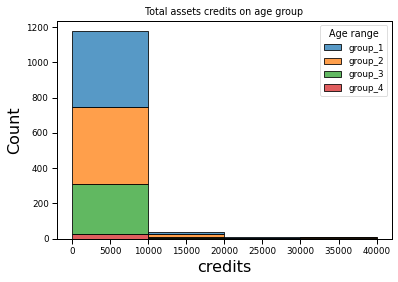

In [272]:
sns.histplot(data = total_flow, x = 'credits', bins= range(0,50000, 10000), label='credits',
             hue = 'Age range', multiple= 'stack').set_title('Total assets credits on age group')

Text(0.5, 1.0, 'Total debits based on age group')

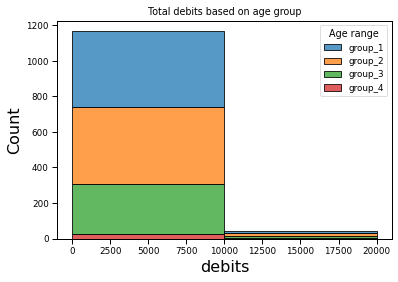

In [273]:
sns.histplot(data = total_flow, x = 'debits', bins= range(0,25000, 10000), label='debits',
             hue = 'Age range', multiple= 'stack').set_title('Total debits based on age group')

# Observations: 
## Largest volume of debit is in the range 0-10000€ for age group 18-40

Debit transaction frequency based on age group

Text(0.5, 1.0, 'Total Debit Transactions based on age group')

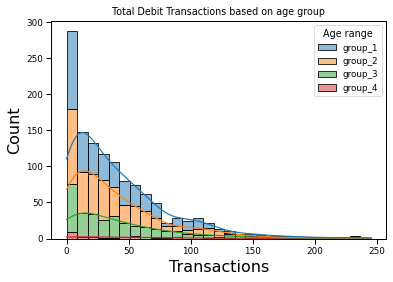

In [274]:
total_deb_trans = pd.concat([pd.DataFrame(data.loc[:,['TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card',
                'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']].sum(axis=1), columns=['Transactions']),
                             data['Age range']], axis = 1)
sns.histplot(data = total_deb_trans, x = 'Transactions',
             hue = 'Age range', kde=True, multiple= 'stack').set_title('Total Debit Transactions based on age group')

# Observation: 
## Age group of 18-40 has hightest number of transactions meaning the use is more in this group.

# Exploring the feature variables

### correlation between number of debit transactions against volume of transactions
### Assumption: Is the volume of debit transactions proportional to number of debit transactions?

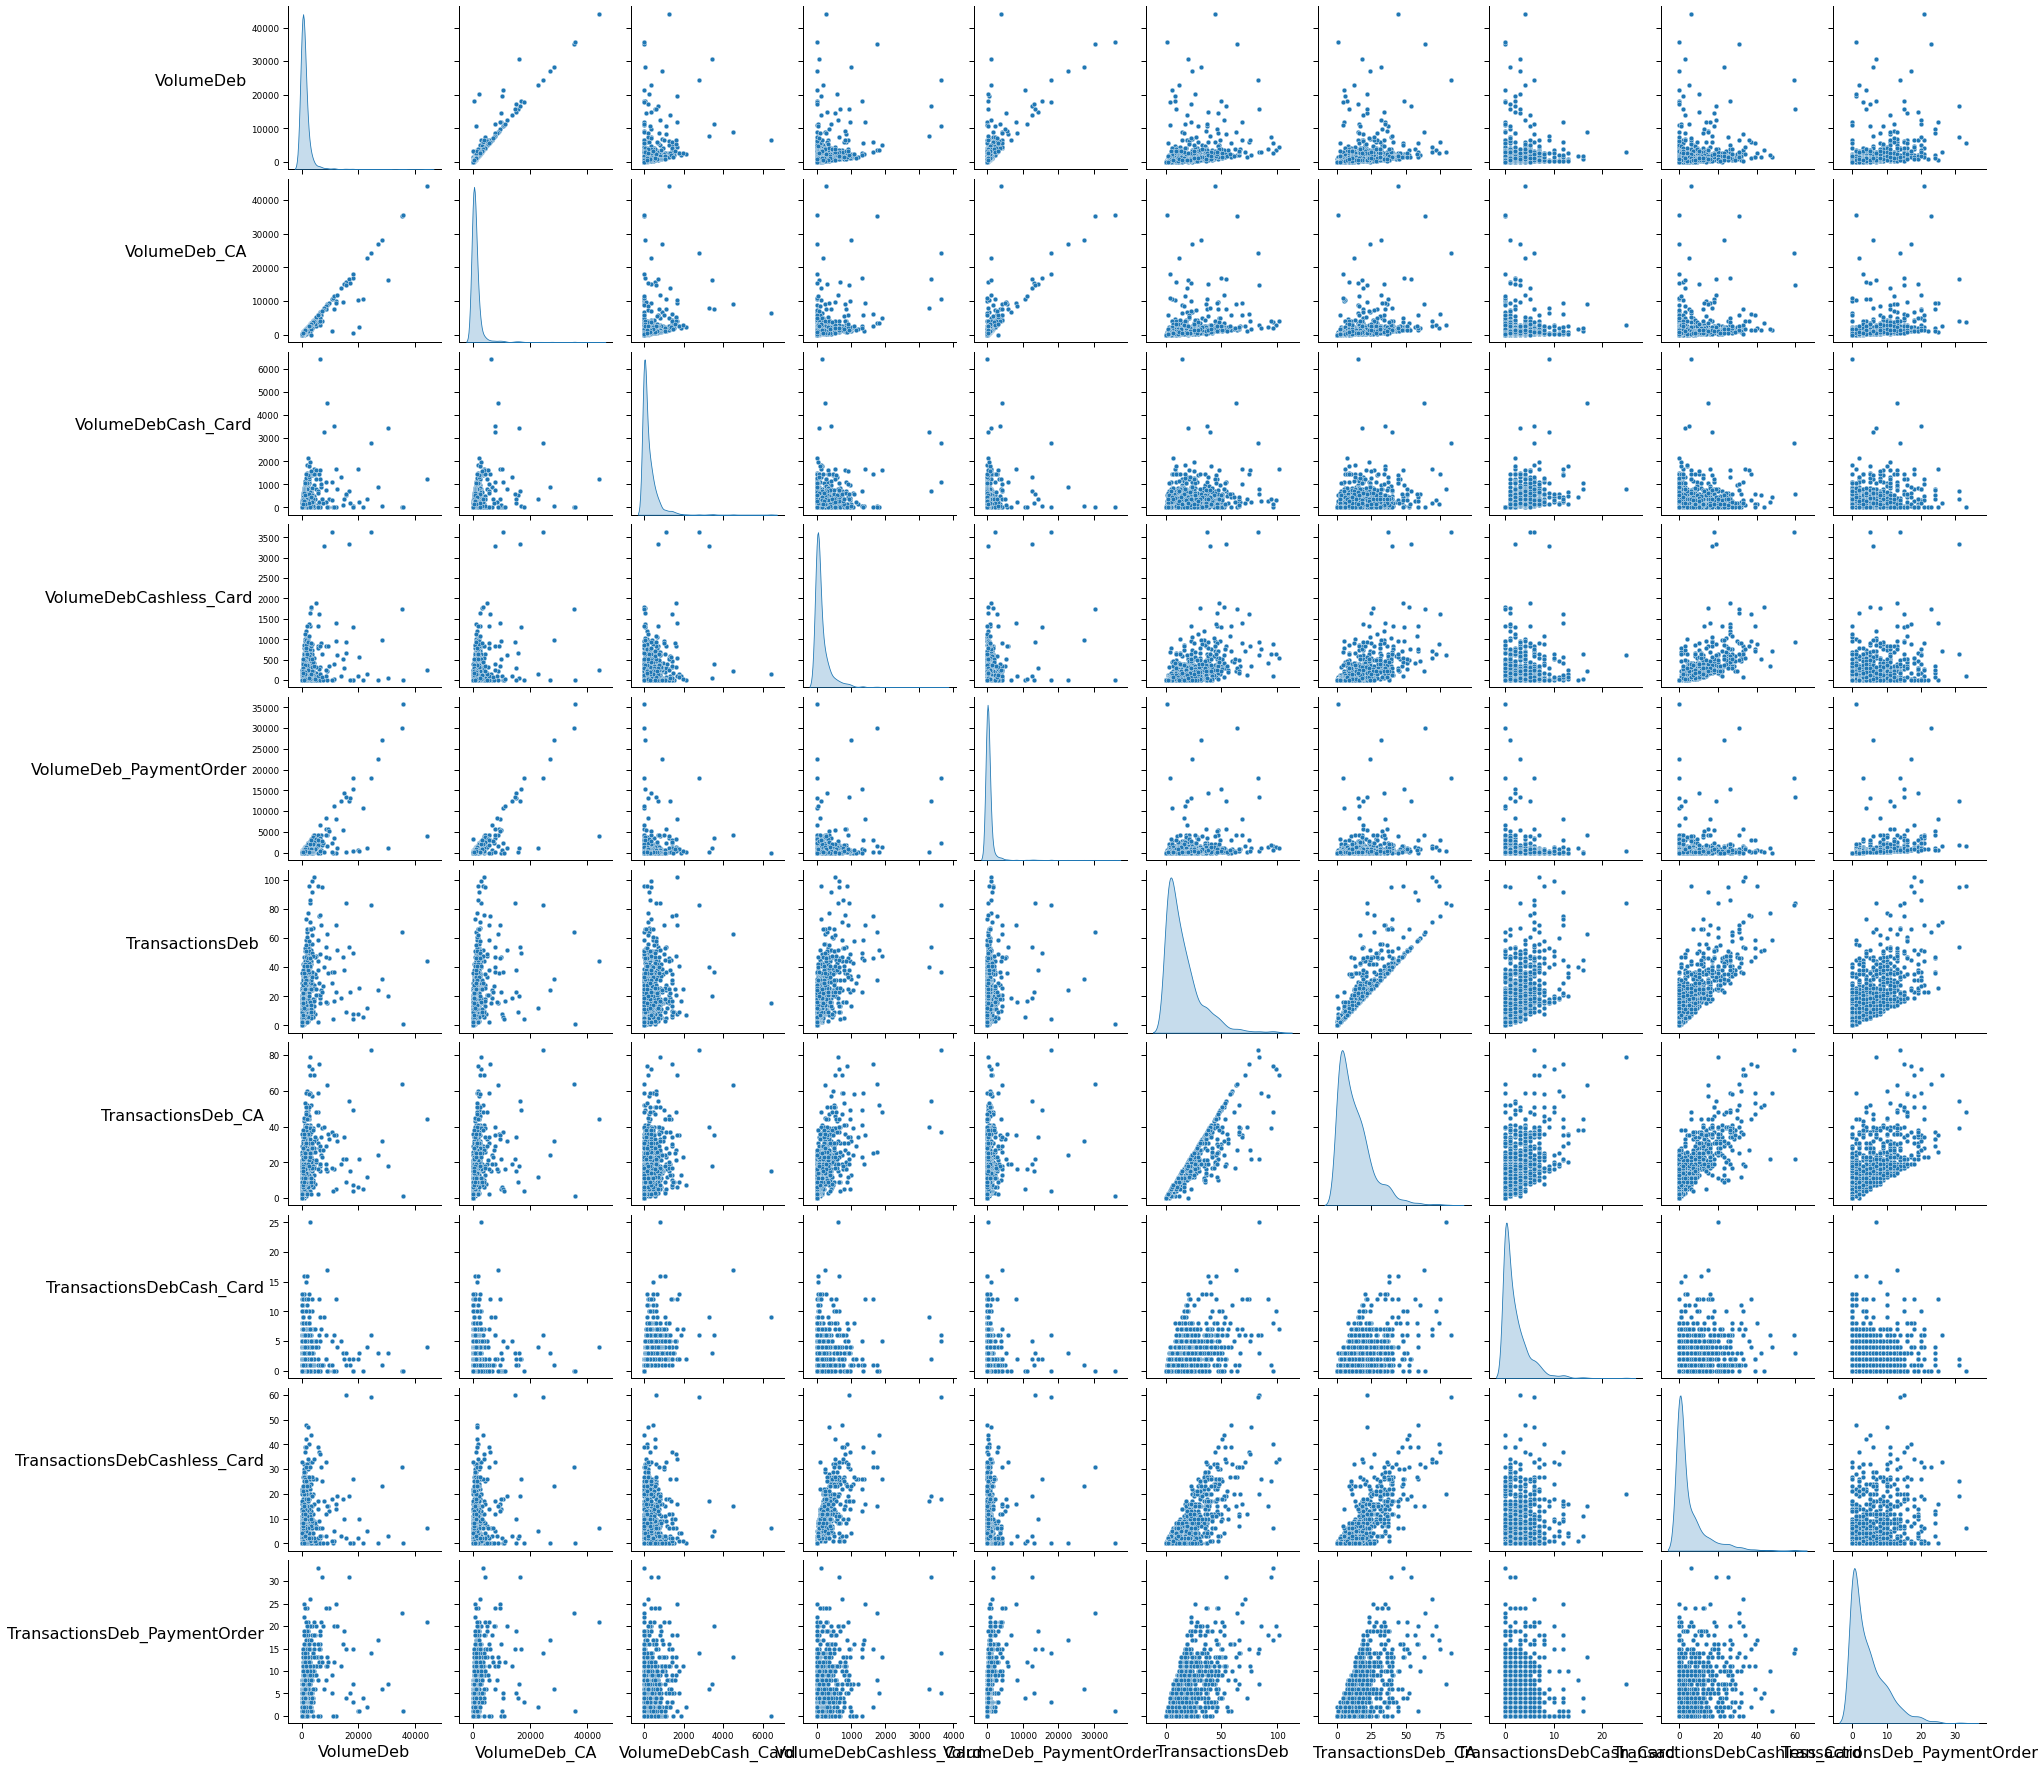

In [275]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    r,_ = pearsonr(x,y)
    ax = ax or plt.gca()
    rho = 'rho'
    ax.annotate(f'{rho} = {r:.2f}', xy= (.1,.9), xycoords = ax.transAxes)

cols = ['VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder',
        'TransactionsDeb', 'TransactionsDeb_CA', 'TransactionsDebCash_Card', 'TransactionsDebCashless_Card', 'TransactionsDeb_PaymentOrder']

g = sns.pairplot(data, vars = data[cols], diag_kind='kde')
g.map(corrfunc)
sns.set_context("paper", rc={"axes.labelsize":16})
for ax in g.axes.flatten():
    ax.set_ylabel(ax.get_ylabel(),rotation =0, horizontalalignment = 'right')
plt.show()

# Observations:
## 1. TransactionDeb is correlated with TransactionDeb_CA and TransactionDebCashless_Card. Two of them can be removed.
## 3. VolumeDeb and VolumeDeb_CA are correlated. One can be removed
## 4. VolumeDeb and VolumeDebPayment_Order are correlated. One can be removed
## 5. VolumeDebCashless_Card and TransactionDebCashless_Card are correlated. One can be removed

### Assumption outcome : Number of debit transactions is proportional to volume of debit transactions only for cashless cards.
### The complete debit volume mostly consists of VolumeDeb_CA, VolumeDebPayment_Order mostly. Complete debit transactions consist mostly of TransactionDeb_CA and Transacti

Checking correlation for products owned and Volume of debit transactions
### Assumption: More product ownership leads to more volume of debits

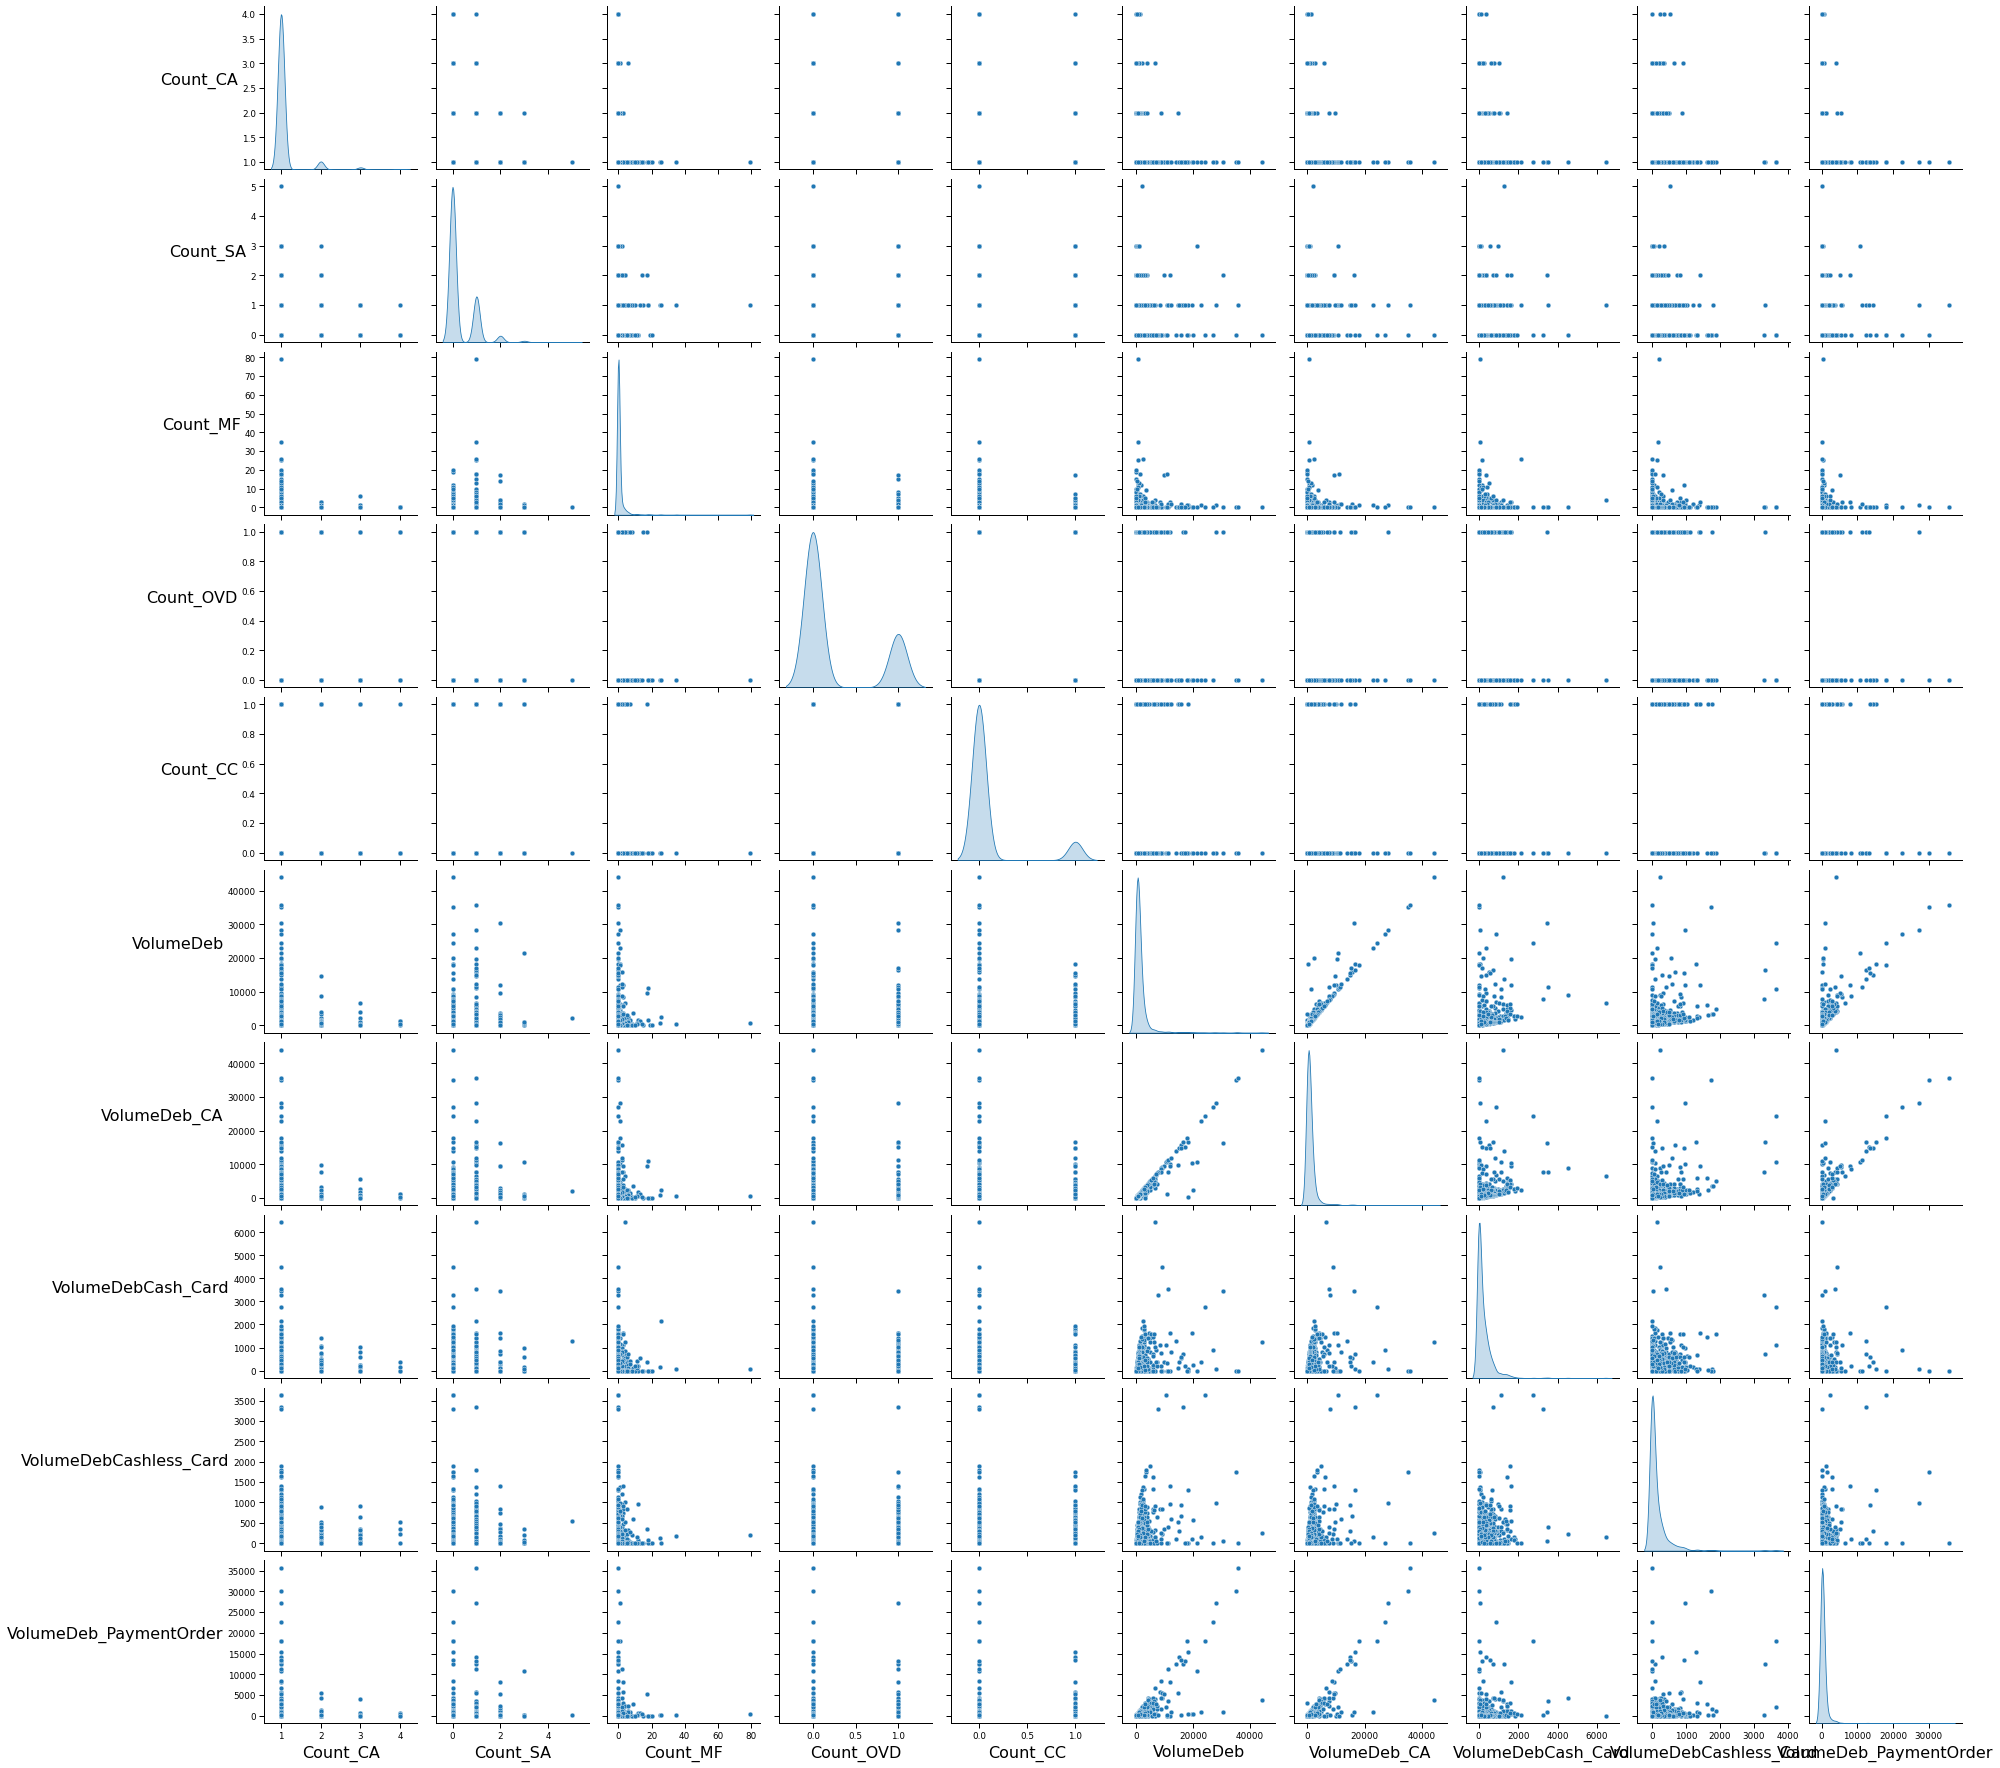

In [276]:
cols = ['Count_CA', 'Count_SA', 'Count_MF', 'Count_OVD', 'Count_CC', 'VolumeDeb',
        'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder']

g = sns.pairplot(data, vars = data[cols], diag_kind='kde')
g.map(corrfunc)
sns.set_context("paper", rc={"axes.labelsize":16})
for ax in g.axes.flatten():
    ax.set_ylabel(ax.get_ylabel(),rotation =0, horizontalalignment = 'right')
plt.show()

# Observations
## 1. No correlation at all
## Assumption outcome: Assumption wrong

Check correlation between Volume of credit transactions and debit transactions
### Assumption: Clients with larger credit volumes probably have a high income and hence higher spending potential

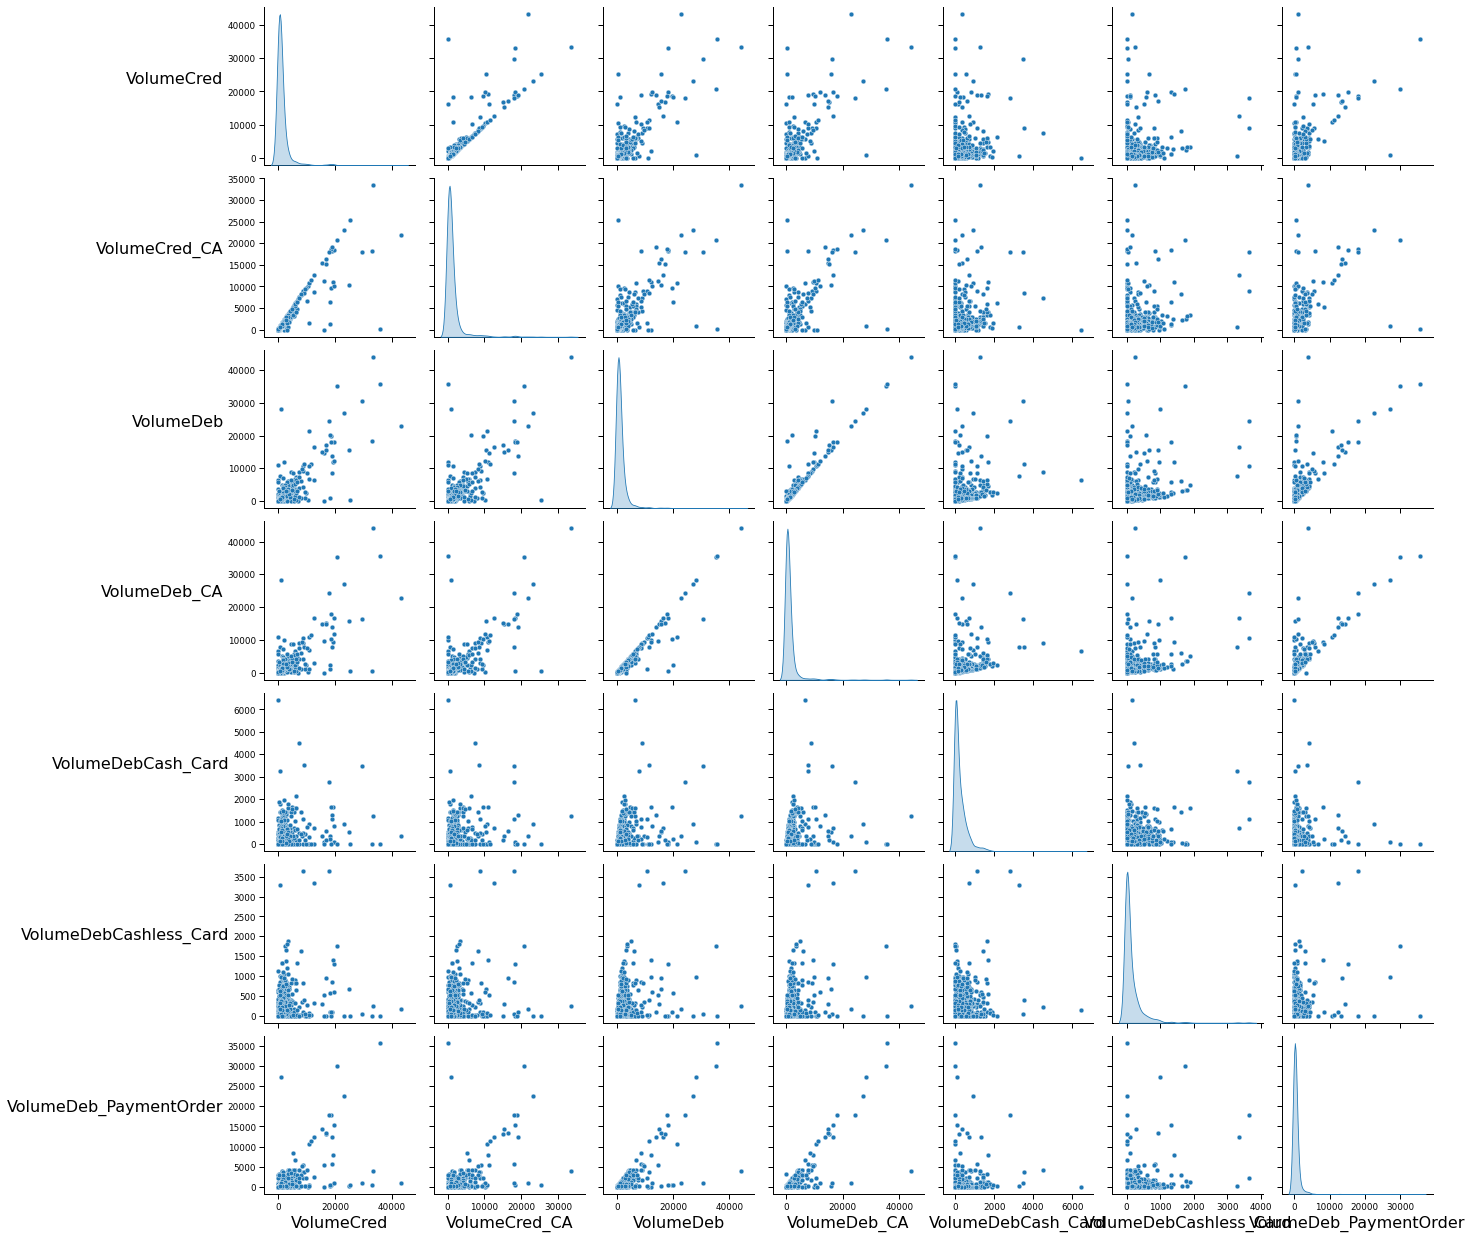

In [277]:
cols = ['VolumeCred', 'VolumeCred_CA', 'VolumeDeb', 'VolumeDeb_CA', 'VolumeDebCash_Card', 'VolumeDebCashless_Card', 'VolumeDeb_PaymentOrder']

g = sns.pairplot(data, vars = data[cols], diag_kind='kde')
g.map(corrfunc)
sns.set_context("paper", rc={"axes.labelsize":16})
for ax in g.axes.flatten():
    ax.set_ylabel(ax.get_ylabel(),rotation =0, horizontalalignment = 'right')
plt.show()

# Observations
## 1. VolumeCred, VolumeCred_CA, VolumeDeb, VolumeDeb_CA are correlated. One or more of them can be removed
## 2. VolumeCred_CA and VolumeDeb_PaymentOrder are correlated. One of them can be removed.

### Assumption outcome: Except for Cash and Cashless card debit volumes, rest of the debit volumes prove the assumption is correct.

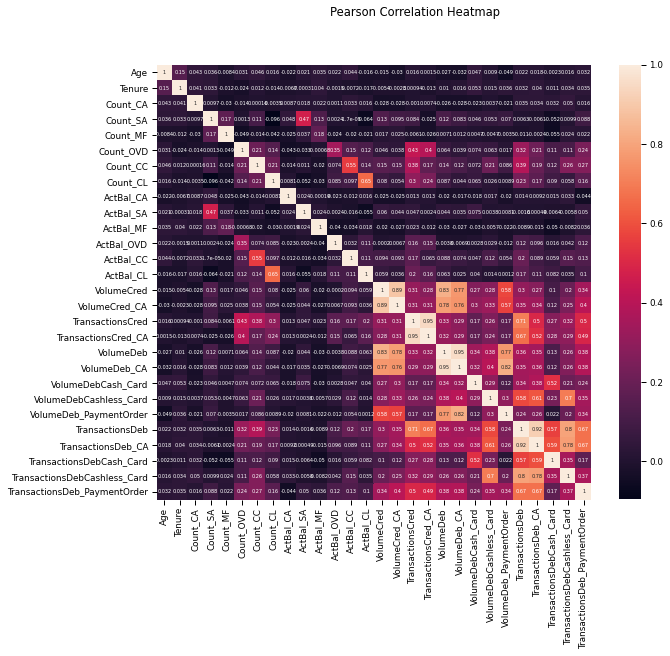

In [278]:
# check colliniearity with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.drop(['Age range', 'Client'], axis=1).corr(), square=True, annot=True,
            annot_kws={"fontsize":5})
plt.suptitle("Pearson Correlation Heatmap")
plt.show()


Removing residual correlations

In [279]:
drop_cols = ['VolumeCred_CA', 'TransactionsCred_CA', 'TransactionsDeb_CA', 'VolumeDeb_CA']
data.drop(drop_cols, axis = 1, inplace=True)

# Exploring target variables
Count of datapoints per class

/Users/lanaguest/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lanaguest/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lanaguest/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


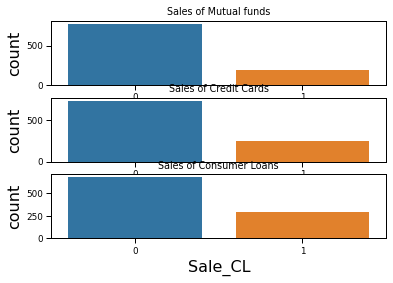

In [280]:
fig, ax =plt.subplots(3,1)
sns.countplot(sales_revenue['Sale_MF'], ax=ax[0]).set_title("Sales of Mutual funds")
sns.countplot(sales_revenue['Sale_CC'], ax=ax[1]).set_title("Sales of Credit Cards")
sns.countplot(sales_revenue['Sale_CL'], ax=ax[2]).set_title("Sales of Consumer Loans")
fig.show()

Counts of different products

Text(0.5, 1.0, 'Quantity of products purchased')

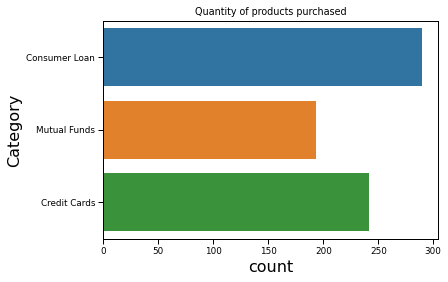

In [281]:
counts = pd.DataFrame({'count': {0:sum(sales_revenue['Sale_CL']),1:sum(sales_revenue['Sale_MF']), 2:sum(sales_revenue['Sale_CC'])} ,
                      'Category': {0:'Consumer Loan', 1:'Mutual Funds', 2 :'Credit Cards'}})

sns.barplot(data=counts, x= 'count', y='Category').set_title('Quantity of products purchased')

joining target variables for CL

In [282]:
data_CL= sales_revenue[['Sale_CL', 'Revenue_CL', 'Client']].merge(data.reset_index(drop=True), on = 'Client',
                                                                  how = 'left').sort_values(by= 'Client')

dropping the outlier clients removed earlier

In [283]:
data_CL.dropna(inplace=True)

## Exploring the target values for consumer loans 

In [284]:
count_pur = len(data_CL[data_CL['Sale_CL']==1])
count_no_pur = len(data_CL[data_CL['Sale_CL']==0])
print('Percentage of clients who purchased Consumer loan are {}%'.format((count_pur/len(data_CL))*100))
print('Percentage of clients who did not purchase Consumer loan are {}%'.format((count_no_pur/len(data_CL))*100))

Percentage of clients who purchased Consumer loan are 24.86631016042781%
Percentage of clients who did not purchase Consumer loan are 75.1336898395722%


In [285]:
# check mean balances of clients who took a consumer loan against those who did not
mean_bal = data_CL.drop(['Age range', 'Sex', 'Client', 'Revenue_CL'], axis=1).groupby('Sale_CL').mean()
mean_bal.head()

,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,...,VolumeCred,TransactionsCred,VolumeDeb,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
Sale_CL,,,,,,,,,,,,,,,,,,,,,
0,49.405694,89.523132,1.060498,0.302491,0.814947,0.247331,0.113879,0.076512,2214.190900,2508.873676,...,1326.588420,5.097865,1180.448643,230.710663,142.172736,456.116188,14.898577,1.830961,5.012456,4.332740
1,47.301075,99.677419,1.129032,0.381720,0.935484,0.274194,0.112903,0.112903,2099.369099,2285.859499,...,2157.349003,6.801075,2448.764257,305.882809,192.215317,1225.217064,17.930108,2.177419,5.333333,5.354839


## Assumption outcome:
### 1. Average Tenure of clients who took CL is higher. Hence loyal customers are more likely to respond to offers
### 2. Average CL balance of clients who took loan is higher.
### 3. Average MF balance of clients who took loan is higher. Probably Bank offers loans on MF investments.
### 4. Average Debit transactions of clients who took loans is higher. Proably people who spend more need loans and hence are potential buyers
### 5. Average age of clients who took loan is less and probably in age group 18-50

# Propensity Model for Consumer Loans

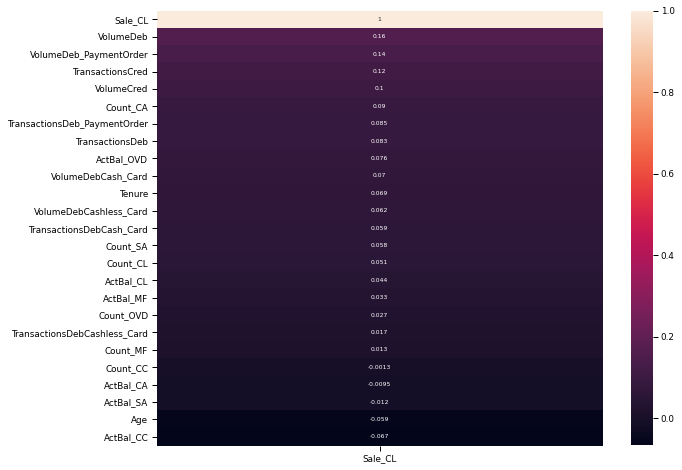

In [286]:
# Correlation of numerical features with target
corr = data_CL.drop(['Client', 'Sex', 'Age range', 'Revenue_CL'], axis = 1).corr()['Sale_CL'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.heatmap(corr.to_frame(), annot=True, annot_kws={'size':6})
plt.show()

In [287]:
# dropping categorical variables
data_CL.drop(['Age range'], axis = 1, inplace=True)

In [288]:
# drop least important features
col_drop = ['ActBal_CL', 'ActBal_SA', 'Count_CC', 'ActBal_CC']
data_CL.drop(col_drop, axis = 1, inplace = True)

In [289]:
# OHE of categorical variables
data_CL = pd.get_dummies(data=data_CL, columns=['Sex'])

In [299]:
# split data intro train and test
from sklearn.model_selection import train_test_split
X_train_CL, X_val_CL, y_train_CL, y_val_CL = train_test_split(data_CL.drop(['Revenue_CL', 'Sale_CL'], axis = 1),
                                                              data_CL['Sale_CL'], test_size=0.2, shuffle=True, random_state=42)


client_val = X_val_CL['Client']
client_val_revenue = sales_revenue[['Client', 'Revenue_CL']].merge(pd.DataFrame(client_val, columns=['Client']),
                                                                   on = 'Client', how = 'left')
X_train_CL.drop(['Client'], axis = 1, inplace = True)
X_val_CL.drop(['Client'], axis = 1, inplace = True)

In [44]:
! pip install imblearn

In [300]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
df_CL_rsmpl = smote.fit_resample(X_train_CL, y_train_CL)
print('Original 1s are {} and 0s are {}'.format(len(y_train_CL[y_train_CL==1]), len(y_train_CL[y_train_CL==0])))
print('New 1s are {} and 0s are {}'.format(len(df_CL_rsmpl[1][df_CL_rsmpl[1]==1]), len(df_CL_rsmpl[1][df_CL_rsmpl[1]==0])))

Original 1s are 146 and 0s are 452
New 1s are 452 and 0s are 452


In [301]:
# shuffle training dataset
df_train_rsmpl = pd.concat([df_CL_rsmpl[0], df_CL_rsmpl[1]], axis = 1).sample(frac=1)

X_train_CL_rsmpl = df_train_rsmpl.drop(['Sale_CL'], axis = 1)
y_train_CL_rsmpl = df_train_rsmpl['Sale_CL']

In [293]:
# modelling
from sklearn import  linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score

model = linear_model.LogisticRegression(class_weight='balanced', max_iter=10000000, penalty='l2')

grid = {'solver':['newton-cg', 'lbfgs', 'liblinear'],
        'C': np.linspace(0.001,1,5).tolist(),
        'class_weight': ['balanced'],
        'max_iter': [100000],
        'penalty': ['l2']
       }

searcher = GridSearchCV(model, grid, n_jobs=-1, cv=5, scoring='accuracy')
searcher.fit(X_train_CL_rsmpl, y_train_CL_rsmpl)
best_score = searcher.best_score_
best_param = searcher.best_params_

In [302]:
# build best model:
best_model = linear_model.LogisticRegression(penalty='l2', class_weight='balanced', solver=best_param['solver'],
                                             C = best_param['C'], max_iter=10000000)
logistic = best_model.fit(X_train_CL_rsmpl, y_train_CL_rsmpl)
preds = best_model.predict(X_val_CL)
print(classification_report(y_val_CL, preds))


              precision    recall  f1-score   support

           0       0.76      0.83      0.79       110
           1       0.37      0.28      0.31        40

    accuracy                           0.68       150
   macro avg       0.56      0.55      0.55       150
weighted avg       0.65      0.68      0.66       150



Text(32.7, 0.5, 'Actual')

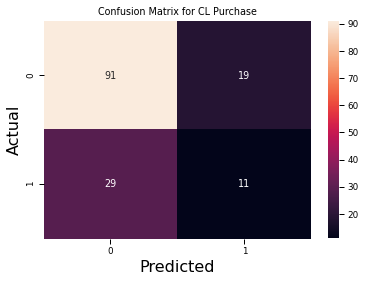

In [303]:
# plot confusion matrix
ax = plt.subplot()
confusion_matrix_CL = confusion_matrix(y_val_CL, preds)
sns.heatmap(confusion_matrix_CL, annot=True, ax = ax).set_title('Confusion Matrix for CL Purchase')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

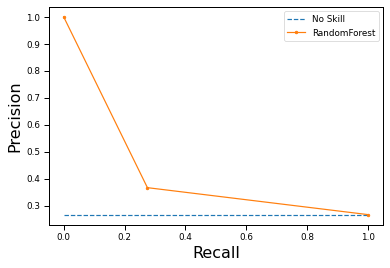

In [304]:
# Precision Recall curve

precision, recall, thresholds = precision_recall_curve(y_val_CL, preds)
no_skill = len(y_val_CL[y_val_CL==1]) / len(y_val_CL)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='RandomForest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [305]:
# predict for clients with labels
df_inf = data_CL.drop(['Sale_CL', 'Revenue_CL', 'Client'], axis = 1)
clients = data_CL[['Client', 'Revenue_CL']]
df_inf['propensity'] = best_model.predict_proba(df_inf)[:,-1]
df_inf['Sale'] = best_model.predict(df_inf.drop(['propensity'], axis = 1))
df_inf.sort_values(by = 'propensity', ascending=False, inplace=True)

data_CL_result = pd.concat([clients, df_inf[['propensity', 'Sale']]], axis = 1).sort_values(by='propensity', ascending=False)
data_CL_result.to_csv('CL_results.csv', index=False)

In [307]:
# predict propensity for clients without labels
df_inf = data[~data.Client.isin(sales_revenue.Client)]
# OHE of categorical variables
df_inf = pd.get_dummies(data=df_inf, columns=['Sex'])

# drop least important features
col_drop = ['ActBal_CL', 'ActBal_SA', 'Count_CC', 'ActBal_CC', 'Age range']
df_inf.drop(col_drop, axis = 1, inplace = True)
clients = df_inf['Client']
df_inf.drop(['Client'], axis = 1, inplace = True)

df_inf['propensity'] = best_model.predict_proba(df_inf)[:,-1]
df_inf_CL = pd.concat([df_inf['propensity'], clients], axis=1)
df_inf_CL.to_csv('result_CL_new_clients.csv', index=False)

# Exploring Target variables for Mutual Funds

In [320]:
# joining target variables for CL
data_MF= sales_revenue[['Sale_MF', 'Revenue_MF', 'Client']].merge(data.reset_index(drop=True), on = 'Client',
                                                                  how = 'left').sort_values(by= 'Client')
# dropping the outlier clients removed earlier
data_MF.dropna(inplace=True)

In [321]:
count_pur = len(data_MF[data_MF['Sale_MF']==1])
count_no_pur = len(data_MF[data_MF['Sale_MF']==0])
print('Percentage of clients who purchased Consumer loan are {}%'.format((count_pur/len(data_MF))*100))
print('Percentage of clients who did not purchase Consumer loan are {}%'.format((count_no_pur/len(data_MF))*100))

Percentage of clients who purchased Consumer loan are 20.32085561497326%
Percentage of clients who did not purchase Consumer loan are 79.67914438502673%


In [322]:
# check mean balances of clients who took a consumer loan against those who did not
mean_bal = data_MF.drop([ 'Sex', 'Client', 'Revenue_MF'], axis=1).groupby('Sale_MF').mean()
mean_bal.head()

,Age,Tenure,Count_CA,Count_SA,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,...,VolumeCred,TransactionsCred,VolumeDeb,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
Sale_MF,,,,,,,,,,,,,,,,,,,,,
0,49.332215,92.164430,1.083893,0.320470,0.486577,0.258389,0.112416,0.092282,2323.621789,2418.727558,...,1478.022454,5.359060,1550.281372,254.650687,154.522505,649.312069,15.105705,1.941275,4.577181,4.508389
1,47.118421,91.592105,1.052632,0.328947,2.250000,0.236842,0.118421,0.059211,1644.601003,2589.442422,...,1749.396210,6.157895,1282.332841,228.827538,154.984955,639.721570,17.796053,1.822368,7.111842,4.894737


# Observations
## 1. Clients who purchased MF have lesser average Age and Tenure.
## 2. Clients having already purchased MF are more likely to purchase them.
## 3. Clients having higher average assets are more likely to purchase Mutual Funds
## 4. Clients with higher liabilities are less unlikely to purchase MF
## 5. Clients with higher average credit transactions are more likely to purchase MF.

# Propensity model for Mutual Funds

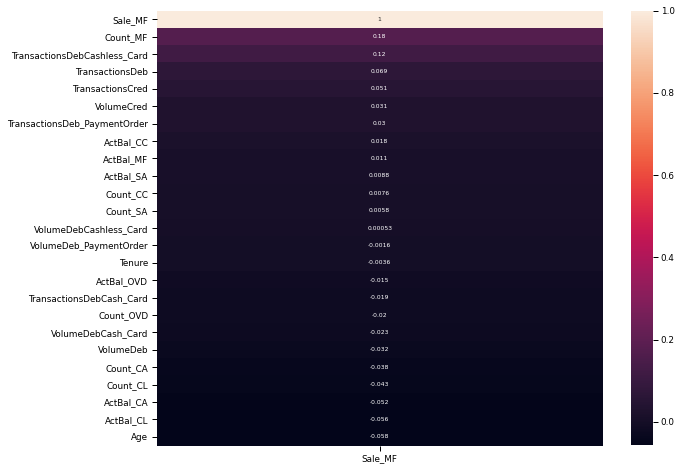

In [311]:
# Correlation of numerical features with target
corr = data_MF.drop(['Client', 'Sex', 'Revenue_MF'], axis = 1).corr()['Sale_MF'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.heatmap(corr.to_frame(), annot=True, annot_kws={'size':6})
plt.show()

In [323]:
# drop least important features
col_drop = ['ActBal_CL', 'ActBal_CA', 'Count_CA', 'Count_CL', 'VolumeDeb', 'VolumeDebCash_Card', 'ActBal_OVD']
data_MF.drop(col_drop, axis = 1, inplace = True)

In [324]:
# OHE of categorical variables
data_MF = pd.get_dummies(data=data_MF, columns=['Sex'])

In [330]:
# split data intro train and test
from sklearn.model_selection import train_test_split
X_train_MF, X_val_MF, y_train_MF, y_val_MF = train_test_split(data_MF.drop(['Revenue_MF', 'Sale_MF'], axis = 1),
                                                              data_MF['Sale_MF'], test_size=0.10, shuffle=True, random_state=42)

In [332]:
X_train_MF.drop(['Age range'], axis = 1, inplace = True)

In [333]:
# Dealing with class imbalance with random oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
df_MF_rsmpl = smote.fit_resample(X_train_MF, y_train_MF)
print('Original 1s are {} and 0s are {}'.format(len(y_train_MF[y_train_MF==1]), len(y_train_MF[y_train_MF==0])))
print('New 1s are {} and 0s are {}'.format(len(df_MF_rsmpl[1][df_MF_rsmpl[1]==1]), len(df_MF_rsmpl[1][df_MF_rsmpl[1]==0])))


Original 1s are 141 and 0s are 532
New 1s are 532 and 0s are 532


In [334]:
# shuffle training dataset
df_train_rsmpl = pd.concat([df_MF_rsmpl[0], df_MF_rsmpl[1]], axis = 1).sample(frac=1)

X_train_MF_rsmpl = df_train_rsmpl.drop(['Sale_MF'], axis = 1)
y_train_MF_rsmpl = df_train_rsmpl['Sale_MF']

X_train_MF_rsmpl.drop(['Client'], axis = 1, inplace=True)
X_val_MF.drop(['Client', 'Age range'], axis = 1, inplace=True)


In [318]:
# modelling
from sklearn import  linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score

model = linear_model.LogisticRegression(class_weight='balanced', max_iter=100000000, penalty='l2')

grid = {'solver':['newton-cg', 'lbfgs', 'liblinear'],
        'C': np.linspace(0.001,1,5).tolist(),
        'class_weight': ['balanced'],
        'max_iter': [10000000],
        'penalty': ['l2']
       }

searcher = GridSearchCV(model, grid, n_jobs=-1, cv=5, scoring='accuracy')
searcher.fit(X_train_MF_rsmpl, y_train_MF_rsmpl)
best_score = searcher.best_score_
best_param = searcher.best_params_

In [335]:
# build best model:
best_model = linear_model.LogisticRegression(penalty='l2', class_weight='balanced', solver=best_param['solver'],
                                             C = best_param['C'], max_iter=10000000)
logistic = best_model.fit(X_train_MF_rsmpl, y_train_MF_rsmpl)
preds = best_model.predict(X_val_MF)
print(classification_report(y_val_MF, preds))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        64
           1       0.36      0.45      0.40        11

    accuracy                           0.80        75
   macro avg       0.63      0.66      0.64        75
weighted avg       0.82      0.80      0.81        75



Text(32.7, 0.5, 'Actual')

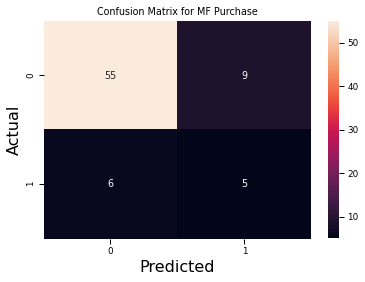

In [336]:
# plot confusion matrix
ax = plt.subplot()
confusion_matrix_CL = confusion_matrix(y_val_MF, preds)
sns.heatmap(confusion_matrix_CL, annot=True, ax = ax).set_title('Confusion Matrix for MF Purchase')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

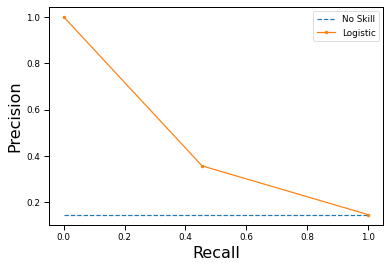

In [337]:
# Precision Recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val_MF, preds)
no_skill = len(y_val_MF[y_val_MF==1]) / len(y_val_MF)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [338]:
# predict for clients with labels
df_inf = data_MF.drop(['Sale_MF', 'Revenue_MF', 'Client', 'Age range'], axis = 1)
clients = data_MF[['Client', 'Revenue_MF']]
df_inf['propensity'] = best_model.predict_proba(df_inf)[:,-1]
df_inf['Sale'] = best_model.predict(df_inf.drop(['propensity'], axis = 1))
df_inf.sort_values(by = 'propensity', ascending=False, inplace=True)

data_MF_result = pd.concat([clients, df_inf[['propensity', 'Sale']]], axis = 1).sort_values(by='propensity', ascending=False)
data_MF_result.to_csv('MF_results.csv', index=False)

In [339]:
# predict revenues for clients without labels
df_inf = data[~data.Client.isin(sales_revenue.Client)]
# OHE of categorical variables
df_inf = pd.get_dummies(data=df_inf, columns=['Sex'])

# drop least important features
col_drop = ['ActBal_CL', 'ActBal_CA', 'Count_CA', 'Count_CL', 'VolumeDeb', 'VolumeDebCash_Card', 'ActBal_OVD', 'Age range']
df_inf.drop(col_drop, axis = 1, inplace = True)
clients = df_inf['Client']
df_inf.drop(['Client'], axis = 1, inplace = True)

df_inf['propensity'] = best_model.predict_proba(df_inf)[:,-1]
df_inf_MF = pd.concat([df_inf['propensity'], clients], axis=1)
df_inf_MF.to_csv('result_MF_new_clients.csv', index=False)

# Exploration of target variable for Credit Cards

In [340]:
# joining target variables for CL
data_CC= sales_revenue[['Sale_CC', 'Revenue_CC', 'Client']].merge(data.reset_index(drop=True), on = 'Client',
                                                                  how = 'left').sort_values(by= 'Client')
# dropping the outlier clients removed earlier
data_CC.dropna(inplace=True)

# check mean balances of clients who took a consumer loan against those who did not
mean_bal = data_CC.drop([ 'Sex', 'Client', 'Revenue_CC'], axis=1).groupby('Sale_CC').mean()

# Observations
## 1. Clients who purchased CC have higher average Age and Tenure.
## 2. Clients whose average overdrafts are more are more likely to purchase CC
## 2. Clients having already purchased CC are similarly likely to purchase them as the ones who have not.
## 3. Clients with lesser number of CC are likely to by them.
## 3. Clients having higher average assets are more likely to purchase Credict Cards
## 4. Clients with higher liabilities are less unlikely to purchase CC
## 5. Clients with higher average credit transactions are more likely to purchase CC.

In [341]:
count_pur = len(data_CC[data_CC['Sale_CC']==1])
count_no_pur = len(data_CC[data_CC['Sale_CC']==0])
print('Percentage of clients who purchased Consumer loan are {}%'.format((count_pur/len(data_CC))*100))
print('Percentage of clients who did not purchase Consumer loan are {}%'.format((count_no_pur/len(data_CC))*100))

Percentage of clients who purchased Consumer loan are 25.668449197860966%
Percentage of clients who did not purchase Consumer loan are 74.33155080213903%


# Propensity Model for Credit Cards

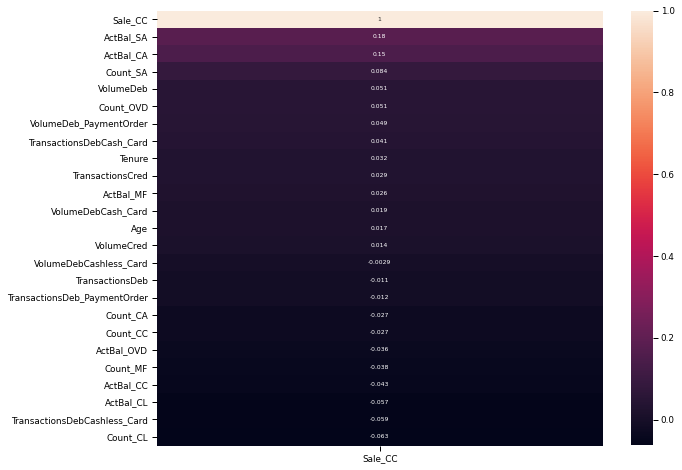

In [342]:
# Correlation of numerical features with target
corr = data_CC.drop(['Client', 'Sex', 'Revenue_CC'], axis = 1).corr()['Sale_CC'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.heatmap(corr.to_frame(), annot=True, annot_kws={'size':6})
plt.show()

In [343]:
# drop least important features
col_drop = ['TransactionsDebCashless_Card', 'Count_CL', 'ActBal_CL', 'ActBal_CC', 'Count_MF','TransactionsDeb_PaymentOrder', 'Age range']
data_CC.drop(col_drop, axis = 1, inplace = True)

In [344]:
# OHE of categorical variables
data_CC = pd.get_dummies(data=data_CC, columns=['Sex'])

In [350]:
# split data intro train and test
from sklearn.model_selection import train_test_split
X_train_CC, X_val_CC, y_train_CC, y_val_CC = train_test_split(data_CC.drop(['Revenue_CC', 'Sale_CC'], axis = 1),
                                                              data_CC['Sale_CC'], test_size=0.10, shuffle=True, random_state = 30)

In [351]:
# Dealing with class imbalance with random oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()
df_CC_rsmpl = smote.fit_resample(X_train_CC, y_train_CC)
print('Original 1s are {} and 0s are {}'.format(len(y_train_CC[y_train_CC==1]), len(y_train_CC[y_train_CC==0])))
print('New 1s are {} and 0s are {}'.format(len(df_CC_rsmpl[1][df_CC_rsmpl[1]==1]), len(df_CC_rsmpl[1][df_CC_rsmpl[1]==0])))

Original 1s are 168 and 0s are 505
New 1s are 505 and 0s are 505


In [352]:
# shuffle training dataset
df_train_rsmpl = pd.concat([df_CC_rsmpl[0], df_CC_rsmpl[1]], axis = 1).sample(frac=1)

X_train_CC_rsmpl = df_train_rsmpl.drop(['Sale_CC'], axis = 1)
y_train_CC_rsmpl = df_train_rsmpl['Sale_CC']

X_train_CC_rsmpl.drop(['Client'], axis = 1, inplace=True)
X_val_CC.drop(['Client'], axis = 1, inplace=True)

In [348]:
# modelling
from sklearn import  linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, average_precision_score

model = linear_model.LogisticRegression(class_weight='balanced', max_iter=100000000, penalty='l2')

grid = {'solver':['newton-cg', 'lbfgs', 'liblinear'],
        'C': np.linspace(0.001,1,5).tolist(),
        'class_weight': ['balanced'],
        'max_iter': [10000000],
        'penalty': ['l2']
       }

searcher = GridSearchCV(model, grid,n_jobs=-1, cv=5, scoring='accuracy')
searcher.fit(X_train_CC_rsmpl, y_train_CC_rsmpl)
best_score = searcher.best_score_
best_param = searcher.best_params_

In [355]:
# build best model:
best_model = linear_model.LogisticRegression(penalty='l2', class_weight='balanced', solver=best_param['solver'],
                                             C = best_param['C'], max_iter=10000000)
logistic = best_model.fit(X_train_CC_rsmpl, y_train_CC_rsmpl)
preds = best_model.predict(X_val_CC)
print(classification_report(y_val_CC, preds))


              precision    recall  f1-score   support

           0       0.72      0.84      0.77        51
           1       0.47      0.29      0.36        24

    accuracy                           0.67        75
   macro avg       0.59      0.57      0.57        75
weighted avg       0.64      0.67      0.64        75



/Users/lanaguest/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Users/lanaguest/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/lanaguest/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')


Text(32.7, 0.5, 'Actual')

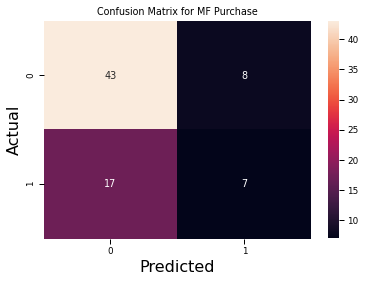

In [356]:
# plot confusion matrix
ax = plt.subplot()
confusion_matrix_CL = confusion_matrix(y_val_CC, preds)
sns.heatmap(confusion_matrix_CL, annot=True, ax = ax).set_title('Confusion Matrix for MF Purchase')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

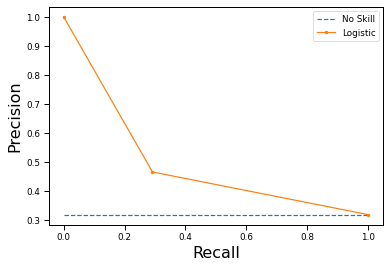

In [357]:
# Precision Recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val_CC, preds)
no_skill = len(y_val_CC[y_val_CC==1]) / len(y_val_CC)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


In [358]:
# predict for clients with labels
df_inf = data_CC.drop(['Sale_CC', 'Revenue_CC', 'Client'], axis = 1)
clients = data_CC[['Client', 'Revenue_CC']]
df_inf['propensity'] = best_model.predict_proba(df_inf)[:,-1]
df_inf['Sale'] = best_model.predict(df_inf.drop(['propensity'], axis = 1))
df_inf.sort_values(by = 'propensity', ascending=False, inplace=True)

data_CC_result = pd.concat([clients, df_inf[['propensity', 'Sale']]], axis = 1).sort_values(by='propensity', ascending=False)
data_CC_result.to_csv('CC_results.csv', index=False)

In [359]:
# predict revenues for clients without labels
data = data.drop(['Age range'], axis = 1)
df_inf = data[~data.Client.isin(sales_revenue.Client)].reset_index(drop = True)
# OHE of categorical variables
df_inf = pd.get_dummies(data=df_inf, columns=['Sex'])

# drop least important features
col_drop = ['TransactionsDebCashless_Card', 'Count_CL', 'ActBal_CL', 'ActBal_CC', 'Count_MF','TransactionsDeb_PaymentOrder']
df_inf.drop(col_drop, axis = 1, inplace = True)
clients= df_inf['Client']
df_inf.drop(['Client'], axis = 1, inplace = True)


df_inf['propensity'] = best_model.predict_proba(df_inf)[:,-1]
df_inf_CC = pd.concat([df_inf['propensity'], clients], axis=1)
df_inf_CC.to_csv('result_CC_new_clients.csv', index=False)

# Revenue prediction model
This model predicts the revenue for clients who do not have labels

In [360]:
# Rejoining the data and doing some initial data cleaning
# join the tables
data = soco_demo.merge(prd_accntbal, on = 'Client', how = 'left').merge(inflow_outflow, on = 'Client', how = 'left').sort_values(by='Client')

data.dropna(subset=['Sex'], inplace = True)

# There are outliers in the column Age (any age less than 18 or more than 100) as well as the tenure columns (where Tenure is greater than age)
# First filter the datapoints where the age is an outlier
data = data.drop(data[(data['Age'] < 18) | (data['Age'] > 100)].index)

# verifying whether the tenure is correct
# assumption: Any Tenure which suggests that a client is with the bank before 18 years of age is incorect
data = data.drop(data[data['Age'] - round(data['Tenure']/12,2) < 18].index)

# fill the missing values with zero since the logic is that a certain account balance column has an entry only when they have that particular account
data.fillna(0, inplace = True)

# remove datapoints with ActBal and Transaction volumes are greater than 60000
data = data.query("ActBal_SA <=60000 & ActBal_CA <=60000 & ActBal_MF <=60000 & VolumeCred <=60000 & VolumeDeb <= 60000")

# Removing colliniearities
drop_cols = ['VolumeCred_CA', 'TransactionsCred_CA', 'TransactionsDeb_CA', 'VolumeDeb_CA']
data.drop(drop_cols, axis = 1, inplace=True)

# joining target variables for CL
data_CL= sales_revenue[['Revenue_CL', 'Client']].merge(data.reset_index(drop=True), on = 'Client',
                                                                  how = 'left').sort_values(by= 'Client')

data_CL.dropna(inplace=True)

# Correlation of numerical features with target for CL model

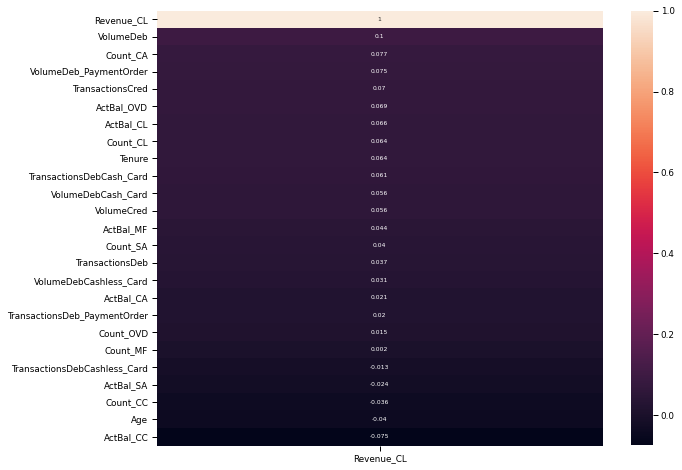

In [361]:
corr = data_CL.drop(['Client', 'Sex'], axis = 1).corr()['Revenue_CL'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.heatmap(corr.to_frame(), annot=True, annot_kws={'size':6})
plt.show()

# drop least important features
col_drop = ['ActBal_CC', 'Count_CC', 'ActBal_SA', 'TransactionsDebCashless_Card']
data_CL.drop(col_drop, axis = 1, inplace = True)

In [362]:
# OHE of categorical variables
data_CL = pd.get_dummies(data=data_CL, columns=['Sex'])
data_CL = data_CL.drop(['Client'], axis = 1)


# Revenue Modelling for CL

In [363]:
# split data intro train and test
from sklearn.model_selection import train_test_split
X_train_CL, X_val_CL, y_train_CL, y_val_CL = train_test_split(data_CL.drop(['Revenue_CL'], axis = 1),
                                                              data_CL['Revenue_CL'], test_size=0.2, shuffle=True, random_state = 42)

In [364]:
# modelling
from sklearn.linear_model import Ridge
model = Ridge(alpha = 10)

model.fit(X_train_CL, y_train_CL)

from sklearn.metrics import mean_squared_error

preds = model.predict(X_val_CL)

print('MSE on val data is {}'.format(mean_squared_error(y_val_CL, preds)))

MSE on val data is 34.96351902053576


In [365]:
# predict revenues for clients without labels

df_inf = data[~data.Client.isin(sales_revenue.Client)].reset_index(drop= True)

# OHE of categorical variables
df_inf = pd.get_dummies(data=df_inf, columns=['Sex'])

# drop least important features
col_drop = ['ActBal_CC', 'Count_CC', 'ActBal_SA', 'TransactionsDebCashless_Card']
df_inf.drop(col_drop, axis = 1, inplace = True)
clients = pd.DataFrame(df_inf['Client'], columns=['Client'])
df_inf.drop(['Client'], axis = 1, inplace=True)

df_inf['predicted_revenue'] = model.predict(df_inf)
df_inf_CL = pd.concat([df_inf, clients], axis = 1)
df_inf_CL[['Client', 'predicted_revenue']].to_csv('CL_results_Revenue_new.csv', index=False)

# Revenue Model for Mutual Funds

In [366]:
# joining target variables for CL
data_MF= sales_revenue[['Revenue_MF', 'Client']].merge(data.reset_index(drop=True), on = 'Client',
                                                                  how = 'left').sort_values(by= 'Client')

data_MF.dropna(inplace=True)

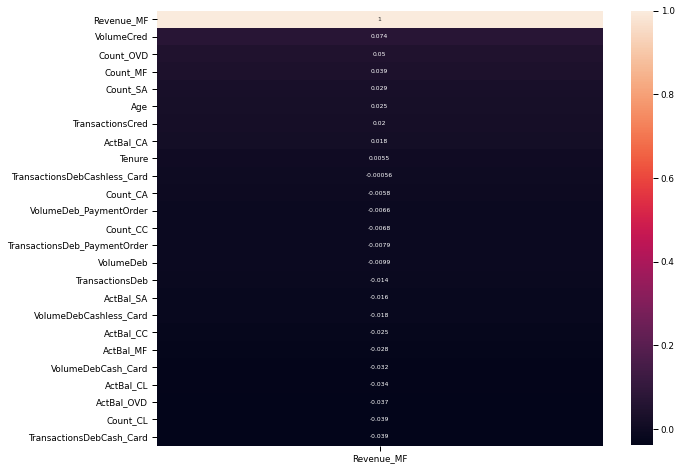

In [367]:
# Correlation of numerical features with target
corr = data_MF.drop(['Client', 'Sex'], axis = 1).corr()['Revenue_MF'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.heatmap(corr.to_frame(), annot=True, annot_kws={'size':6})
plt.show()

# drop least important features
col_drop = ['ActBal_CL', 'Count_CL', 'ActBal_SA', 'TransactionsDebCash_Card', 'ActBal_OVD', 'VolumeDebCashless_Card']
data_MF.drop(col_drop, axis = 1, inplace = True)

In [368]:
# OHE of categorical variables
data_MF = pd.get_dummies(data=data_MF, columns=['Sex'])

data_MF = data_MF.drop(['Client'], axis = 1)


In [369]:

# split data intro train and test
from sklearn.model_selection import train_test_split
X_train_MF, X_val_MF, y_train_MF, y_val_MF = train_test_split(data_MF.drop(['Revenue_MF'], axis = 1),
                                                              data_MF['Revenue_MF'], test_size=0.2, shuffle=True, random_state= 21)

In [370]:
# modelling
from sklearn.linear_model import Ridge
model = Ridge(alpha = 5)

model.fit(X_train_MF, y_train_MF)

from sklearn.metrics import mean_squared_error

preds = model.predict(X_val_MF)

print('MSE on val data is {}'.format(mean_squared_error(y_val_MF, preds)))

MSE on val data is 17.772560426448102


In [371]:
# predict revenues for clients without labels

df_inf = data[~data.Client.isin(sales_revenue.Client)]

# OHE of categorical variables
df_inf = pd.get_dummies(data=df_inf, columns=['Sex'])

# drop least important features
col_drop = ['ActBal_CL', 'Count_CL', 'ActBal_SA', 'TransactionsDebCash_Card', 'ActBal_OVD', 'VolumeDebCashless_Card']
df_inf.drop(col_drop, axis = 1, inplace = True)
clients = pd.DataFrame(df_inf['Client'], columns=['Client'])
df_inf.drop(['Client'], axis = 1, inplace=True)

df_inf['predicted_revenue'] = model.predict(df_inf)
df_inf_MF = pd.concat([df_inf, clients], axis = 1)
df_inf_MF[['Client', 'predicted_revenue']].to_csv('MF_results_Revenue_new.csv', index=False)

# Revenue model for Credit Cards

In [372]:
# joining target variables for CL
data_CC= sales_revenue[['Revenue_CC', 'Client']].merge(data.reset_index(drop=True), on = 'Client',
                                                                  how = 'left').sort_values(by= 'Client')

data_CC.dropna(inplace=True)


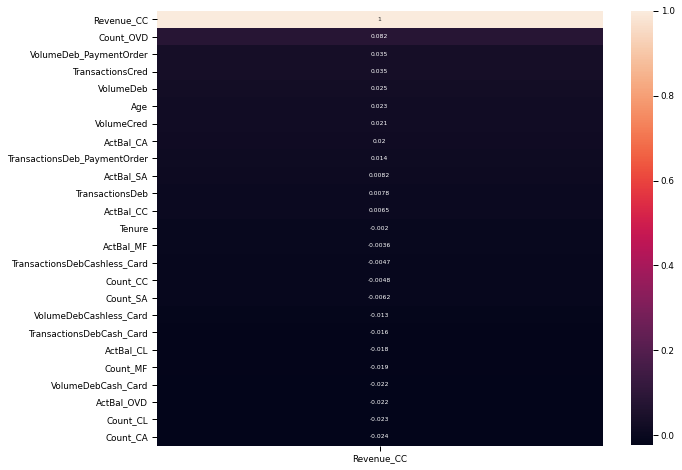

In [373]:
# Correlation of numerical features with target
corr = data_CC.drop(['Client', 'Sex'], axis = 1).corr()['Revenue_CC'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
sns.heatmap(corr.to_frame(), annot=True, annot_kws={'size':6})
plt.show()

# drop least important features
col_drop = ['Count_CA', 'Count_CL', 'ActBal_OVD', 'VolumeDebCash_Card', 'Count_MF', 'ActBal_CL', 'TransactionsDebCash_Card', 'VolumeDebCashless_Card']
data_CC.drop(col_drop, axis = 1, inplace = True)

In [374]:
# OHE of categorical variables
data_CC = pd.get_dummies(data=data_CC, columns=['Sex'])

data_CC = data_CC.drop(['Client'], axis = 1)

In [375]:
# split data intro train and test
from sklearn.model_selection import train_test_split
X_train_CC, X_val_CC, y_train_CC, y_val_CC = train_test_split(data_CC.drop(['Revenue_CC'], axis = 1),
                                                              data_CC['Revenue_CC'], test_size=0.2, shuffle=True, random_state=50)

In [376]:
# modelling
from sklearn.linear_model import Ridge
model = Ridge()

model.fit(X_train_CC, y_train_CC)

from sklearn.metrics import mean_squared_error

preds = model.predict(X_val_CC)

print('MSE on val data is {}'.format(mean_squared_error(y_val_CC, preds)))

MSE on val data is 33.5798295728937


In [377]:
# predict revenues for clients without labels

df_inf = data[~data.Client.isin(sales_revenue.Client)]

# OHE of categorical variables
df_inf = pd.get_dummies(data=df_inf, columns=['Sex'])

# drop least important features
col_drop = ['Count_CA', 'Count_CL', 'ActBal_OVD', 'VolumeDebCash_Card', 'Count_MF', 'ActBal_CL', 'TransactionsDebCash_Card', 'VolumeDebCashless_Card']
df_inf.drop(col_drop, axis = 1, inplace = True)
clients = pd.DataFrame(df_inf['Client'], columns=['Client'])
df_inf.drop(['Client'], axis = 1, inplace=True)

df_inf['predicted_revenue'] = model.predict(df_inf)
df_inf_CC = pd.concat([df_inf, clients], axis = 1)
df_inf_CC[['Client', 'predicted_revenue']].to_csv('CC_results_Revenue_new.csv', index=False)

# Combined Analysis and Final Results
#### Clients for whom target labels are available

In [378]:
import pandas as pd
import seaborn as sns

# Analysis of clients who have labels ==============================================================================

CL_result = pd.read_csv('CL_results.csv', index_col=False).rename(columns={'Revenue_CL':'Revenue'})
CL_result['Category'] = 'Consumer Loan'
MF_result = pd.read_csv('MF_results.csv', index_col=False).rename(columns={'Revenue_MF':'Revenue'})
MF_result['Category'] = 'Mutual Funds'
CC_result = pd.read_csv('CC_results.csv', index_col=False).rename(columns={'Revenue_CC':'Revenue'})
CC_result['Category'] = 'Credit Cards'


result = pd.concat([CL_result[CL_result['Sale']==1], MF_result[MF_result['Sale']==1],
                    CC_result[CC_result['Sale']==1]])

# Visualization

<AxesSubplot:xlabel='Sale', ylabel='count'>

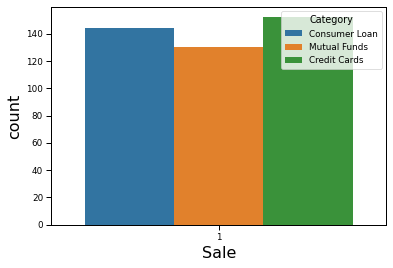

In [379]:
#Sales of different products
sns.countplot(x = 'Sale', hue='Category', data = result)

<AxesSubplot:xlabel='propensity', ylabel='Revenue'>

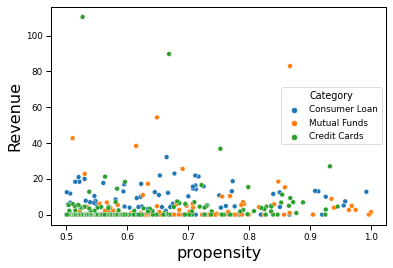

In [380]:

# Relation between Propensity and Revenue
sns.scatterplot(data = result, x = 'propensity', y= 'Revenue', hue = 'Category')

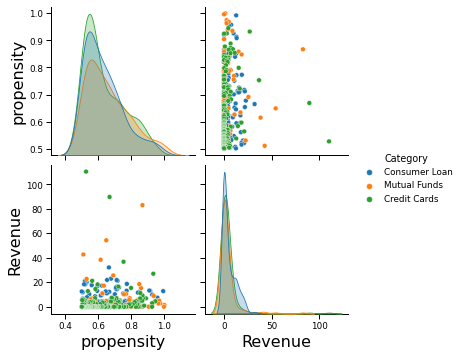

In [381]:
# Correlation between propensity
sns.pairplot(result, vars=['propensity', 'Revenue'], hue = 'Category')

### Assumption: Propensity of 0.6 or greater is considered as good. The clients will always be a potential buyer with this propensity score

In [382]:
clients_contact= result[result['propensity']>=0.60].sort_values(by='Revenue', ascending=False).iloc[0:100,:]

In [383]:
# Final results
print('Number of clients to be contacted for Consumer Loan {} and Expected Revenue is {} €'.
      format(len(clients_contact[clients_contact['Category']=='Consumer Loan']),
             sum(clients_contact['Revenue'][clients_contact['Category']=='Consumer Loan'])))

print('Number of clients to be contacted for Mutual Funds {} and Expected Revenue is {} €'.
      format(len(clients_contact[clients_contact['Category']=='Mutual Funds']),
             sum(clients_contact['Revenue'][clients_contact['Category']=='Mutual Funds'])))

print('Number of clients to be contacted for Credit Cards {} and Expected Revenue is {} €'.
      format(len(clients_contact[clients_contact['Category']=='Credit Cards']),
             sum(clients_contact['Revenue'][clients_contact['Category']=='Credit Cards'])))

Number of clients to be contacted for Consumer Loan 43 and Expected Revenue is 481.16178571428577 €
Number of clients to be contacted for Mutual Funds 26 and Expected Revenue is 363.08375000000007 €
Number of clients to be contacted for Credit Cards 31 and Expected Revenue is 317.42214285714283 €


#### Clients for whom target labels are not available

In [384]:
# Load propensity result
CL_result_new = pd.read_csv('result_CL_new_clients.csv', index_col=False)
CL_result_new['Category'] = 'Consumer Loan'
MF_result_new = pd.read_csv('result_MF_new_clients.csv', index_col=False)
MF_result_new['Category'] = 'Mutual Funds'
CC_result_new = pd.read_csv('result_CC_new_clients.csv', index_col=False)
CC_result_new['Category'] = 'Credit Cards'

result_new = pd.concat([CL_result_new, MF_result_new,CC_result_new])

# Load Revenue results
CL_result_new_rev = pd.read_csv('CL_results_Revenue_new.csv', index_col=False).rename(columns={'predicted_revenue':'Revenue'})
CL_result_new_rev['Revenue'][CL_result_new_rev['Revenue']<0]=0

MF_result_new_rev = pd.read_csv('MF_results_Revenue_new.csv', index_col=False).rename(columns={'predicted_revenue':'Revenue'})
MF_result_new_rev['Revenue'][MF_result_new_rev['Revenue']<0]=0

CC_result_new_rev = pd.read_csv('CC_results_Revenue_new.csv', index_col=False).rename(columns={'predicted_revenue':'Revenue'})
CC_result_new_rev['Revenue'][CC_result_new_rev['Revenue']<0]=0

<ipython-input-384-3ef0daf589a4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CL_result_new_rev['Revenue'][CL_result_new_rev['Revenue']<0]=0
<ipython-input-384-3ef0daf589a4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MF_result_new_rev['Revenue'][MF_result_new_rev['Revenue']<0]=0
<ipython-input-384-3ef0daf589a4>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CC_result_new_rev['Revenue'][CC_result_new_rev['Revenue']<0]=0


In [385]:
result_new_rev = pd.concat([CL_result_new_rev, MF_result_new_rev, CC_result_new_rev])

result_new_clients = result_new.merge(result_new_rev, on= 'Client', how = 'left')

new_clients_contact1= result_new_clients[result_new_clients['propensity']>=0.6].sort_values(by='Revenue',
                                                                                           ascending=False).drop_duplicates(subset=['Client']).iloc[0:100,:]

In [386]:
# Final results
print('Number of clients to be contacted for Consumer Loan {} and Expected Revenue is {} €'.
      format(len(new_clients_contact1[new_clients_contact1['Category']=='Consumer Loan']),
             sum(new_clients_contact1['Revenue'][new_clients_contact1['Category']=='Consumer Loan'])))

print('Number of clients to be contacted for Mutual Funds {} and Expected Revenue is {} €'.
      format(len(new_clients_contact1[new_clients_contact1['Category']=='Mutual Funds']),
             sum(new_clients_contact1['Revenue'][new_clients_contact1['Category']=='Mutual Funds'])))

print('Number of clients to be contacted for Credit Cards {} and Expected Revenue is {} €'.
      format(len(new_clients_contact1[new_clients_contact1['Category']=='Credit Cards']),
             sum(new_clients_contact1['Revenue'][new_clients_contact1['Category']=='Credit Cards'])))

Number of clients to be contacted for Consumer Loan 40 and Expected Revenue is 232.03769987152793 €
Number of clients to be contacted for Mutual Funds 26 and Expected Revenue is 171.1676648601295 €
Number of clients to be contacted for Credit Cards 34 and Expected Revenue is 232.96074155533736 €
